## Logistic Regression

**Mariyum's Part 1**

In [ ]:
## Part 1:

In [ ]:
# importing all the random shit 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from google.colab import drive
import time

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#for Professor 
# from google.colab import drive
# drive.mount('/content/drive')
# % cd "/content/drive/MyDrive/Teaching/2022spring/CS5830 - Data Science Incubator/lecture/l08-linear-regression"

In [ ]:
# for Mariyum
drive.mount('/content/drive')
% cd "/content/drive/MyDrive/Project7"

Mounted at /content/drive
/content/drive/MyDrive/Project7


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# df.drop(columns=['User ID'],axis=1,inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df=df.drop(["User ID"],axis=1)

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
isfemale = np.zeros(len(df))
df['isFemale'] = isfemale

In [ ]:
for i in range(len(df)):
  if df['Gender'][i] == 'Female':
    df['isFemale'][i] = 1
  else:
    df['isFemale'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased,isFemale
0,Male,19,19000,0,0.0
1,Male,35,20000,0,0.0
2,Female,26,43000,0,1.0
3,Female,27,57000,0,1.0
4,Male,19,76000,0,0.0
...,...,...,...,...,...
395,Female,46,41000,1,1.0
396,Male,51,23000,1,0.0
397,Female,50,20000,1,1.0
398,Male,36,33000,0,0.0


In [ ]:
# # create X and y
# feature_cols = ['Age', 'EstimatedSalary', 'isFemale']
# X = df[feature_cols]
# y = df.Purchased

# # # follow the usual sklearn pattern: import, instantiate, fit
# lm = LinearRegression()
# lm.fit(X, y)

# # print intercept and coefficients
# print(lm.intercept_)
# print(lm.coef_)

In [ ]:
# # create a fitted model with all three features
# lm = smf.ols(formula='Purchased ~ Age + EstimatedSalary, data=df).fit()

# # print the coefficients
# display(lm.params)

# # print a summary of the fitted model
# lm.summary()

### Logistic Regression

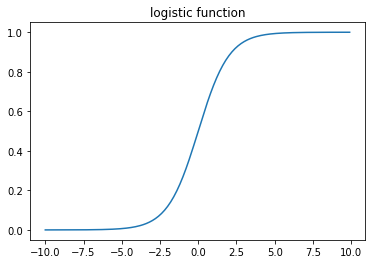

In [ ]:
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))
#     return 1.0 / (1 + np.exp(-x))

x = [x_/10 for x_ in range(-100,100)]
y = [logistic(x_) for x_ in x]
plt.plot(x, y);
plt.title('logistic function');

In [ ]:
df.Age = (df.Age - df.Age.mean()) / df.Age.std()
df.EstimatedSalary = (df.EstimatedSalary - df.EstimatedSalary.mean()) / df.EstimatedSalary.std()

In [ ]:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased,isFemale
0,Male,-1.779569,-1.488183,0,0.0
1,Male,-0.253270,-1.458854,0,0.0
2,Female,-1.111813,-0.784307,0,1.0
3,Female,-1.016419,-0.373714,0,1.0
4,Male,-1.779569,0.183521,0,0.0
5,Male,-1.016419,-0.344386,0,0.0
6,Female,-1.016419,0.418146,0,1.0
7,Female,-0.539451,2.353802,1,1.0
8,Male,-1.207207,-1.077589,0,0.0
9,Female,-0.253270,-0.139089,0,1.0


### Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EstimatedSalary', 'isFemale']]
y = df.Purchased

t = 0.5
lm = LogisticRegression(class_weight={0:t, 1:1-t})
lm.fit(X, y)

# display(X)
# display(y)

LogisticRegression(class_weight={0: 0.5, 1: 0.5})

In [ ]:
# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X)

y_pred

# display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.85869565 0.83870968]'

'recall = [0.92217899 0.72727273]'

'f-score = [0.88930582 0.77902622]'

test: Removing the Gender

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EstimatedSalary']]
y = df.Purchased

t = 0.5
lm = LogisticRegression(class_weight={0:t, 1:1-t})
lm.fit(X, y)

# display(X)
# display(y)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X)

y_pred

# display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[0,1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.84341637 0.83193277]'

'recall = [0.92217899 0.69230769]'

'f-score = [0.88104089 0.75572519]'

Text(0, 0.5, 'Estimated Salary')

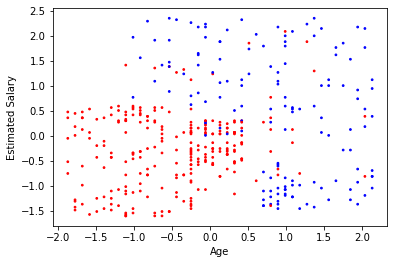

In [ ]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.Age, df.EstimatedSalary, c=color, s=3)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

Text(0, 0.5, 'Estimated Salary')

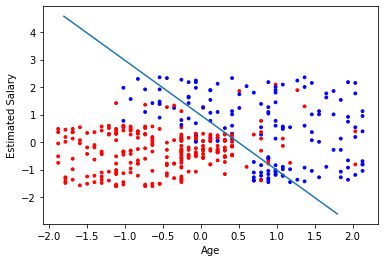

In [ ]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.Age, df.EstimatedSalary, c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [ ]:
lm.coef_[0]

array([2.13144578, 1.06745062])

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math

## Try 1: Logistic Regression & SVM 

In [ ]:
feature_cols = ['Age', 'EstimatedSalary', 'isFemale']
X = df[feature_cols]
y = df.Purchased

#### Feature Selection

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.373387
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.427     
Dependent Variable: Purchased        AIC:              304.7094  
Date:               2022-04-01 15:46 BIC:              316.6838  
No. Observations:   400              Log-Likelihood:   -149.35   
Df Model:           2                LL-Null:          -260.79   
Df Residuals:       397              LLR p-value:      4.0346e-49
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                2.3339   0.2526  9.2402 0.0000  1.8388  2.8289
EstimatedSalary    1.2076   0.1824  6.6192 0.0000  0.8500  1.5651


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
t = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

print(f'Time it took: {time.time()-t}') 

Time it took: 0.0207517147064209


In [ ]:
y_pred_logReg = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logReg)

print("---This is the confusion matrix:---")
print(confusion_matrix)

Accuracy of Logistic Regression Classifier on test set: 0.89
---This is the confusion matrix:---
[[74  5]
 [ 8 33]]


In [ ]:
from sklearn.metrics import classification_report
print ("---Classification Report---")
print(classification_report(y_test, y_pred_logReg))

---Classification Report---
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Evaluation')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

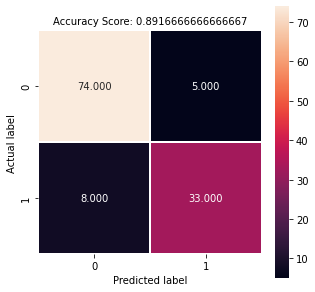

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 10);

### SVM

#### Confusion Matrix - Linear 

In [ ]:
from sklearn import svm

model_linear = svm.SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred_SVC_linear = model_linear.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_SVC_linear)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVC_linear))

y_pred_SVC_linear = model_linear.predict(X_test)
print('Accuracy of Linear Support Vector classifier on test set: {:.2f}'.format(model_linear.score(X_test, y_test)))

[[76  3]
 [13 28]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        79
           1       0.90      0.68      0.78        41

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120

Accuracy of Linear Support Vector classifier on test set: 0.87


#### SVM Poly 

In [ ]:
#SVM - Poly Degree 2 

from sklearn import svm
model_poly = svm.SVC(kernel='poly', degree=2)
model_poly.fit(X_train, y_train)

y_pred_SVC_poly = model_poly.predict(X_test)
print('Accuracy of Polynomial Support Vector classifier on test set: {:.2f}'.format(model_poly.score(X_test, y_test)))

Accuracy of Polynomial Support Vector classifier on test set: 0.84


#### SVM RBF

In [ ]:
#SVM - RBF - Degree 2
from sklearn import svm
model_rbf = svm.SVC(kernel='rbf', degree=2)
model_rbf.fit(X_train, y_train)

y_pred_SVC_rbf = model_rbf.predict(X_test)
print('Accuracy of RBF Support Vector classifier on test set: {:.2f}'.format(model_rbf.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVC_rbf))

Accuracy of RBF Support Vector classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



#Try 2 - Graphing

In [ ]:
X = df[['Age', 'EstimatedSalary']]#, 'isFemale']]
y = df.Purchased

**SVM**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


'precision = [0.83916084 0.85087719]'

'recall = [0.93385214 0.67832168]'

'f-score = [0.8839779  0.75486381]'

Time it took: 1.5896797180175781


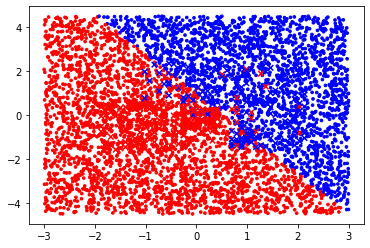

In [ ]:
t = time.time()

feature_cols = ['Age', 'EstimatedSalary']
X = df[feature_cols]
y = df.Purchased

clf = svm.SVC(kernel='linear', class_weight={0:1, 1:1})
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-3,3)
    py = random.uniform(-4.5,4.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.Age, df.EstimatedSalary, c=color, s=30, marker='x')

print(f'Time it took: {time.time()-t}')


## _Polynomial Kernal_

'f-score = [0.86514886 0.66375546]'

Time it took: 0.6516997814178467


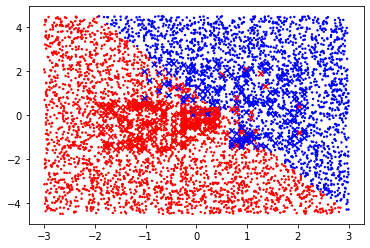

In [ ]:
# Try changing the degree
X = df[['Age', 'EstimatedSalary']]#, 'isFemale']]
y = df.Purchased

t = time.time()
clf = svm.SVC(kernel='poly', degree=8)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
# random data frame
rdf = pd.DataFrame(np.random.rand(5000, 2)*5-2.5, columns=['Age', 'EstimatedSalary'])
newlabels = clf.predict(rdf)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=2);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.Age, df.EstimatedSalary, c=color, s=30, marker='x')

print(f'Time it took: {time.time()-t}') 

Graph looks the same. F-score has decreases by .02, but otherwise I see no noticeable change. More care may be needed into exactly what the difference between these methods are.

## _RBF_

'f-score = [0.93013972 0.88294314]'

Time it took: 0.397247314453125


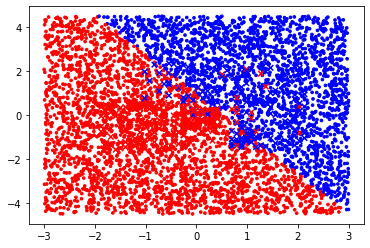

In [ ]:
t = time.time()

X = df[['Age', 'EstimatedSalary']]
y = df.Purchased

clf = svm.SVC(kernel='rbf')# , gamma=30)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
rdf = pd.DataFrame(np.random.rand(5000, 2)*5-2.5, columns=['Age', 'EstimatedSalary'])
newlabels = clf.predict(rdf)
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.Age, df.EstimatedSalary, c=color, s=30, marker='x')
print(f'Time it took: {time.time()-t}')


F-score is improved using the RBF over the previous two methods. 